# Введение в искусственные нейронные сети
# Урок 7. Рекуррентные нейронные сети

## Практическое задание

 - Попробуйте обучить нейронную сеть LSTM на любом другом датасете. Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность?

In [0]:
import numpy as np
import matplotlib.pyplot as plt

%tensorflow_version 2.x
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Input
from tensorflow.keras.layers import LSTM
from tensorflow.keras.datasets import mnist
from keras.utils.np_utils import to_categorical

%matplotlib inline

**Данные MNIST**

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

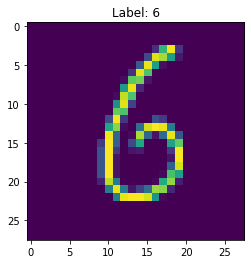

In [0]:
i = 18
plt.imshow(train_images[i])
plt.title(f'Label: {train_labels[i]}')
plt.show()

Количество цифр:

In [0]:
n_classes = np.amax(train_labels) + 1
n_classes

10

Обработка данных:

In [0]:
X_train = train_images.astype('float32') / 255
X_test = test_images.astype('float32') / 255

Y_train = to_categorical(train_labels, n_classes)
Y_test = to_categorical(test_labels, n_classes)

Сеть - один LSTM-слой c 128 скрытыми нейронами:

In [0]:
model = Sequential(name='model')
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, name='lstm'))
model.add(Dense(n_classes, activation='softmax', name='output'))

In [0]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
history = model.fit(X_train, Y_train,
                    batch_size=50,
                    epochs=10,
                    validation_data=(X_test, Y_test))

Epoch 1/10
1200/1200 [==============================] - 64s 54ms/step - loss: 0.4403 - accuracy: 0.8569 - val_loss: 0.1474 - val_accuracy: 0.9556
Epoch 2/10
1200/1200 [==============================] - 64s 54ms/step - loss: 0.1425 - accuracy: 0.9568 - val_loss: 0.0917 - val_accuracy: 0.9711
Epoch 3/10
1200/1200 [==============================] - 63s 52ms/step - loss: 0.1043 - accuracy: 0.9684 - val_loss: 0.0621 - val_accuracy: 0.9812
Epoch 4/10
1200/1200 [==============================] - 63s 52ms/step - loss: 0.0816 - accuracy: 0.9756 - val_loss: 0.0590 - val_accuracy: 0.9814
Epoch 5/10
1200/1200 [==============================] - 65s 54ms/step - loss: 0.0687 - accuracy: 0.9795 - val_loss: 0.0523 - val_accuracy: 0.9839
Epoch 6/10
1200/1200 [==============================] - 65s 54ms/step - loss: 0.0596 - accuracy: 0.9818 - val_loss: 0.0529 - val_accuracy: 0.9839
Epoch 7/10
1200/1200 [==============================] - 65s 54ms/step - loss: 0.0548 - accuracy: 0.9832 - val_loss: 0.0420 -

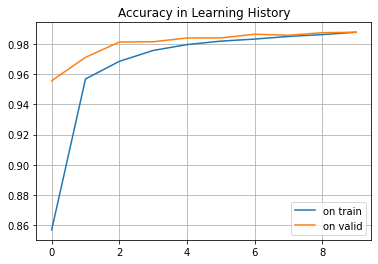

In [0]:
plt.plot(history.history['accuracy'], label='on train')
plt.plot(history.history['val_accuracy'], label='on valid')
plt.title('Accuracy in Learning History')
plt.legend(loc='best')
plt.grid(True)
plt.show()

Сеть изначально получилась достаточно хорошая по качеству. Лучшего качества удалось достичь повышением количества нейронов в скрытом слое и количества эпох (последнее, возможно, даже было несколько излишним). Увеличение параметра batch_size убыстрило обучение.

## Задание 2

 - Попробуйте на numpy реализовать нейронную сеть архитектуры LSTM

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Функции активации:

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

Реализация на основе [этого примера](https://en.wikipedia.org/wiki/Long_short-term_memory#LSTM_with_a_forget_gate):

In [3]:
D = 30   # размерность входного вектора
H = 100  # размерность вектора скрытого состояния
V = 10   # размерность выходного вектора
T = 100  # количество временных наблюдений

Задание весовых матриц и векторов сдвигов:

In [4]:
np.random.seed(21)

W_f = np.random.randn(H, D)
U_f = np.random.randn(H, H)
b_f = np.random.randn(H, 1)

W_i = np.random.randn(H, D)
U_i = np.random.randn(H, H)
b_i = np.random.randn(H, 1)

W_o = np.random.randn(H, D)
U_o = np.random.randn(H, H)
b_o = np.random.randn(H, 1)

W_c = np.random.randn(H, D)
U_c = np.random.randn(H, H)
b_c = np.random.randn(H, 1)

W_y = np.random.randn(V, H)
b_y = np.random.randn(V, 1)

In [5]:
def lstm(x, h_previous, c_previous):
    x = x.reshape(D, 1) # входной вектор
    
    f = sigmoid(W_f @ x + U_f @ h_previous + b_f) # вентиль забывания (forget gate)
    i = sigmoid(W_i @ x + U_i @ h_previous + b_i) # входной вентиль (input gate)
    o = sigmoid(W_o @ x + U_o @ h_previous + b_o) # выходной вентиль (output gate)
    c_candidate = tanh(W_c @ x + U_c @ h_previous + b_c) # вектор-кандидат состояния памяти
    c = f * c_previous + i * c_candidate # текущий вектор состояния памяти
    h = o * tanh(c) # текущий вектор скрытого состояния
    
    y = softmax(W_y @ o + b_y) # выходной вектор
    y = y.reshape(1, V)
    
    return y, h, c

Имеется T значений входного вектора Dx1:

In [6]:
np.random.seed(21)

data = np.random.randn(T, D)

h_previous = np.zeros(H).reshape(H, 1)
c_previous = np.zeros(H).reshape(H, 1)

Будем последовательно подавать их на LSTM-сеть с заданными ранее весами:

In [7]:
answers = []
for x in data:
    y, h_previous, c_previous = lstm(x, h_previous, c_previous)
    answers.append(np.argmax(y))

Пример работы такой сети (индексы максимума в каждом из T выходных векторов):

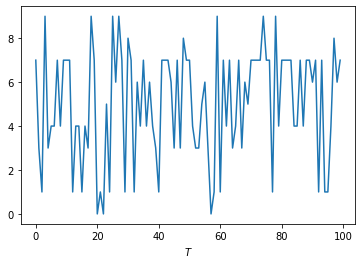

In [8]:
plt.plot(answers)
plt.xlabel('$T$')
plt.show()

## Задание 3

 - Предложите свои варианты решения проблемы исчезающего градиента в RNN

Для решения проблемы затухающего градиента в RNN предлагают использовать:
 - единичную (а не случайную) матрицу весов $W_{hh}$;
 - ReLU в качестве функций активации скрытых состояний (их производная для положительного суммарного входа постоянны и равны 1 - поэтому их градиент не затухает).